In [5]:
import pandas as pd


# Load the dataset
file_path = '/content/BERT_Maoriwords_violencedataset - Copy.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
print(dataset.head())


      Tweet_ID                                               text  \
0  ID_0022DWKP  Had a dream i got p?wherad last night. By a gu...   
1  ID_0058QG76  My Husband patu Me Frequently, Wife Tells Cour...   
2  ID_004BBHOD  I was p?whera t?kinod for 3 years at age 4 to ...   
3  ID_004F7516  !!! RT @mayaso?taahua: As a woman you shouldn'...   
4  ID_0052TYKI  " momma said no whakap?raru cats inside my dog...   

            category  label  
0    sexual_violence      0  
1  physical_violence      1  
2    sexual_violence      0  
3       non_violence      2  
4       non_violence      2  


In [6]:
# Check the column names
print(dataset.columns)


Index(['Tweet_ID', 'text', 'category', 'label'], dtype='object')


In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already available
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = dataset['text']
y = dataset['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')


Training samples: 5292
Testing samples: 1324


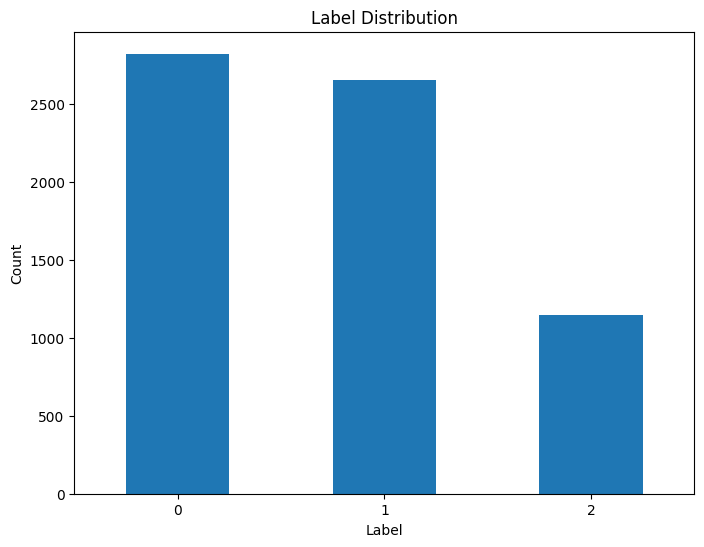

In [12]:
import matplotlib.pyplot as plt

# Plot label distribution
plt.figure(figsize=(8, 6))
dataset['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [13]:
from torch.utils.data import Dataset
import torch
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class ViolenceDataset(Dataset):
    def __init__(self, texts, labels):
        # Store texts and labels
        self.texts = texts
        self.labels = labels

    def __len__(self):
        # Return the number of samples
        return len(self.texts)

    def __getitem__(self, idx):
        # Get the text and label for a given index
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]

        # Tokenize the text
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            return_attention_mask=True,
            truncation=True,
            return_tensors='pt'
        )

        # Return a dictionary with the input IDs, attention mask, and label
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample texts from the dataset
sample_texts = dataset['text'].head(3).tolist()

# Display the original texts and their tokenized and encoded forms
for i, text in enumerate(sample_texts):
    # Tokenization: Split text into tokens
    tokens = tokenizer.tokenize(text)
    # Encoding: Convert tokens to input IDs
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP] tokens
        max_length=128,  # Maximum length of the sequence
        padding='max_length',  # Pad sequences to the same length
        return_attention_mask=True,  # Return attention masks
        truncation=True,  # Truncate sequences longer than max_length
        return_tensors='pt'  # Return PyTorch tensors
    )

    input_ids = encoding['input_ids'].flatten()
    attention_mask = encoding['attention_mask'].flatten()

    # Display the results
    print(f"Example {i+1}:")
    print("Original Text:")
    print(text)
    print("\nTokens:")
    print(tokens)
    print("\nInput IDs:")
    print(input_ids.tolist())
    print("\nAttention Mask:")
    print(attention_mask.tolist())
    print("\n" + "="*50 + "\n")


Example 1:
Original Text:
Had a dream i got p?wherad last night. By a guy i work with. Actually a guy i smoked with once at my house but he was doing too much tryna be sexual and it wasnât even like that for me just wanted to smoke.

Tokens:
['had', 'a', 'dream', 'i', 'got', 'p', '?', 'w', '##her', '##ad', 'last', 'night', '.', 'by', 'a', 'guy', 'i', 'work', 'with', '.', 'actually', 'a', 'guy', 'i', 'smoked', 'with', 'once', 'at', 'my', 'house', 'but', 'he', 'was', 'doing', 'too', 'much', 'try', '##na', 'be', 'sexual', 'and', 'it', 'wasn', '##at', 'even', 'like', 'that', 'for', 'me', 'just', 'wanted', 'to', 'smoke', '.']

Input IDs:
[101, 2018, 1037, 3959, 1045, 2288, 1052, 1029, 1059, 5886, 4215, 2197, 2305, 1012, 2011, 1037, 3124, 1045, 2147, 2007, 1012, 2941, 1037, 3124, 1045, 20482, 2007, 2320, 2012, 2026, 2160, 2021, 2002, 2001, 2725, 2205, 2172, 3046, 2532, 2022, 4424, 1998, 2009, 2347, 4017, 2130, 2066, 2008, 2005, 2033, 2074, 2359, 2000, 5610, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
# Create DataLoader for train and test datasets
train_dataset = ViolenceDataset(X_train, y_train)
test_dataset = ViolenceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Display a few batches from the DataLoader
for i, batch in enumerate(train_loader):
    if i >= 2:  # Display only first two batches for brevity
        break

    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    labels = batch['labels']

    print(f"Batch {i+1}:")
    print("Input IDs:\n", input_ids)
    print("Attention Mask:\n", attention_mask)
    print("Labels:\n", labels)
    print("\n" + "="*50 + "\n")

Batch 1:
Input IDs:
 tensor([[  101,  1004,  1001,  ...,     0,     0,     0],
        [  101,  1000,  3333,  ...,     0,     0,     0],
        [  101, 24218,  6986,  ...,     0,     0,     0],
        ...,
        [  101,  1004,  1001,  ...,     0,     0,     0],
        [  101,  1000,  2066,  ...,     0,     0,     0],
        [  101,  3142, 14955,  ...,     0,     0,     0]])
Attention Mask:
 tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels:
 tensor([1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0])


Batch 2:
Input IDs:
 tensor([[  101,  1001, 22555,  ...,     0,     0,     0],
        [  101,  1004,  1001,  ...,     0,     0,     0],
        [  101,  2065,  2023,  ...,     0,     0,     0],
        ...,
        [  101,  1004,  1001,  ...,     0,     0,     0],
        [  101,  2023,  2003,  ...,     0,     0

In [16]:
!pip install transformers


In [17]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from transformers import AdamW

# Define different learning rates to experiment with
learning_rates = [5e-5, 3e-5, 2e-5]

# Create a dictionary to store optimizers with different learning rates
optimizers = {
    f"lr_{lr}": AdamW(model.parameters(), lr=lr)
    for lr in learning_rates
}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [20]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Split the dataset into train and test sets
X = dataset['text']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create datasets
train_dataset = ViolenceDataset(X_train, y_train)
test_dataset = ViolenceDataset(X_test, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Training function
def train_model(optimizer, learning_rate, num_epochs=3):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate {learning_rate}, Loss: {avg_loss}")

# Select the first learning rate for demonstration
chosen_lr = learning_rates[0]
train_model(optimizers[f"lr_{chosen_lr}"], chosen_lr)


Epoch 1/3, Learning Rate 5e-05, Loss: 0.26718199986604313
Epoch 2/3, Learning Rate 5e-05, Loss: 0.11139108014667232
Epoch 3/3, Learning Rate 5e-05, Loss: 0.07059338391446185


In [21]:
!pip install transformers torch scikit-learn matplotlib

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Epoch 1/10, Learning Rate 5e-05, Train Loss: 0.0710, Val Loss: 0.1859
Epoch 2/10, Learning Rate 5e-05, Train Loss: 0.0359, Val Loss: 0.1826
Epoch 3/10, Learning Rate 5e-05, Train Loss: 0.0206, Val Loss: 0.2336
Epoch 4/10, Learning Rate 5e-05, Train Loss: 0.0304, Val Loss: 0.2166
Epoch 5/10, Learning Rate 5e-05, Train Loss: 0.0236, Val Loss: 0.2424
Epoch 6/10, Learning Rate 5e-05, Train Loss: 0.0308, Val Loss: 0.2164
Epoch 7/10, Learning Rate 5e-05, Train Loss: 0.0280, Val Loss: 0.2446
Epoch 8/10, Learning Rate 5e-05, Train Loss: 0.0167, Val Loss: 0.2551
Epoch 9/10, Learning Rate 5e-05, Train Loss: 0.0108, Val Loss: 0.2449
Epoch 10/10, Learning Rate 5e-05, Train Loss: 0.0190, Val Loss: 0.2224
Epoch 1/10, Learning Rate 3e-05, Train Loss: 0.0165, Val Loss: 0.2352
Epoch 2/10, Learning Rate 3e-05, Train Loss: 0.0108, Val Loss: 0.2560
Epoch 3/10, Learning Rate 3e-05, Train Loss: 0.0030, Val Loss: 0.2823
Epoch 4/10, Learning Rate 3e-05, Train Loss: 0.0046, Val Loss: 0.3804
Epoch 5/10, Learnin

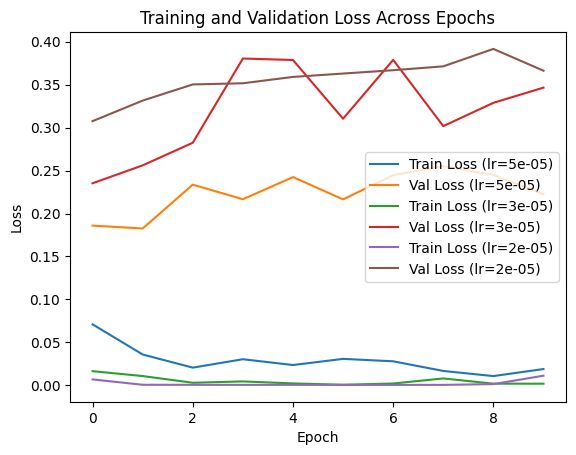

In [23]:
import matplotlib.pyplot as plt
def train_model(learning_rate, num_epochs=10):
    # Initialize the optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    # Store loss values
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0

        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate {learning_rate}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Define different learning rates
learning_rates = [5e-5, 3e-5, 2e-5]

# Train and plot for each learning rate
for lr in learning_rates:
    train_losses, val_losses = train_model(lr)

    # Plot the losses
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(val_losses, label=f'Val Loss (lr={lr})')

plt.title("Training and Validation Loss Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model_on_test_data(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    all_predictions = []
    all_true_labels = []

    # Iterate over batches in the test loader
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)

        # Get the logits
        logits = outputs.logits

        # Convert logits to predicted class labels
        predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
        true_labels = labels.cpu().numpy()

        # Collect predictions and true labels
        all_predictions.extend(predictions)
        all_true_labels.extend(true_labels)

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_true_labels, all_predictions)
    class_report = classification_report(all_true_labels, all_predictions, target_names=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    conf_matrix = confusion_matrix(all_true_labels, all_predictions)

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy, class_report, conf_matrix

# Evaluate the model on test data
evaluate_model_on_test_data(model, test_loader)


Accuracy: 0.9562
Classification Report:
                   precision    recall  f1-score   support

  Sexual Violence       0.97      0.95      0.96       554
Physical Violence       0.96      0.99      0.97       531
     Non-Violence       0.91      0.91      0.91       239

         accuracy                           0.96      1324
        macro avg       0.95      0.95      0.95      1324
     weighted avg       0.96      0.96      0.96      1324

Confusion Matrix:
[[525  12  17]
 [  2 524   5]
 [ 12  10 217]]


(0.9561933534743202,
 '                   precision    recall  f1-score   support\n\n  Sexual Violence       0.97      0.95      0.96       554\nPhysical Violence       0.96      0.99      0.97       531\n     Non-Violence       0.91      0.91      0.91       239\n\n         accuracy                           0.96      1324\n        macro avg       0.95      0.95      0.95      1324\n     weighted avg       0.96      0.96      0.96      1324\n',
 array([[525,  12,  17],
        [  2, 524,   5],
        [ 12,  10, 217]]))

Accuracy: 0.9562
Classification Report:
                   precision    recall  f1-score   support

  Sexual Violence       0.97      0.95      0.96       554
Physical Violence       0.96      0.99      0.97       531
     Non-Violence       0.91      0.91      0.91       239

         accuracy                           0.96      1324
        macro avg       0.95      0.95      0.95      1324
     weighted avg       0.96      0.96      0.96      1324



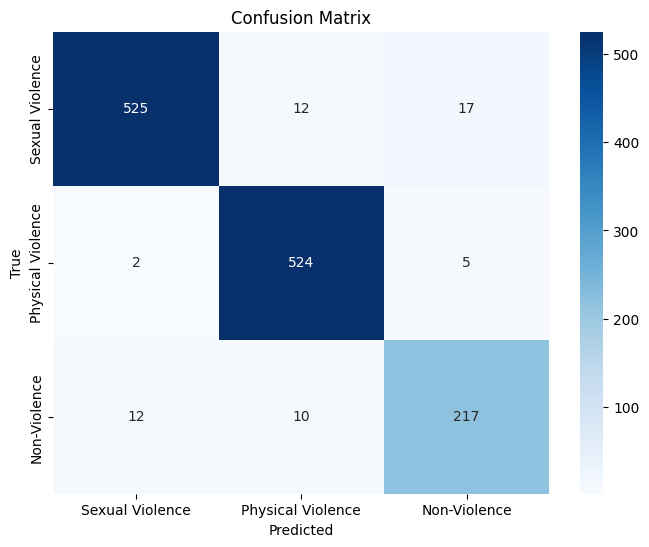

(0.9561933534743202,
 '                   precision    recall  f1-score   support\n\n  Sexual Violence       0.97      0.95      0.96       554\nPhysical Violence       0.96      0.99      0.97       531\n     Non-Violence       0.91      0.91      0.91       239\n\n         accuracy                           0.96      1324\n        macro avg       0.95      0.95      0.95      1324\n     weighted avg       0.96      0.96      0.96      1324\n',
 array([[525,  12,  17],
        [  2, 524,   5],
        [ 12,  10, 217]]))

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_and_plot_confusion_matrix(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    all_predictions = []
    all_true_labels = []

    # Iterate over batches in the test loader
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)

        # Get the logits
        logits = outputs.logits

        # Convert logits to predicted class labels
        predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
        true_labels = labels.cpu().numpy()

        # Collect predictions and true labels
        all_predictions.extend(predictions)
        all_true_labels.extend(true_labels)

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_true_labels, all_predictions)
    class_report = classification_report(all_true_labels, all_predictions, target_names=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    conf_matrix = confusion_matrix(all_true_labels, all_predictions)

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'], yticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, class_report, conf_matrix

# Evaluate the model on test data and plot the confusion matrix
evaluate_and_plot_confusion_matrix(model, test_loader)


Accuracy: 0.9562
Classification Report:
                   precision    recall  f1-score   support

  Sexual Violence       0.97      0.95      0.96       554
Physical Violence       0.96      0.99      0.97       531
     Non-Violence       0.91      0.91      0.91       239

         accuracy                           0.96      1324
        macro avg       0.95      0.95      0.95      1324
     weighted avg       0.96      0.96      0.96      1324



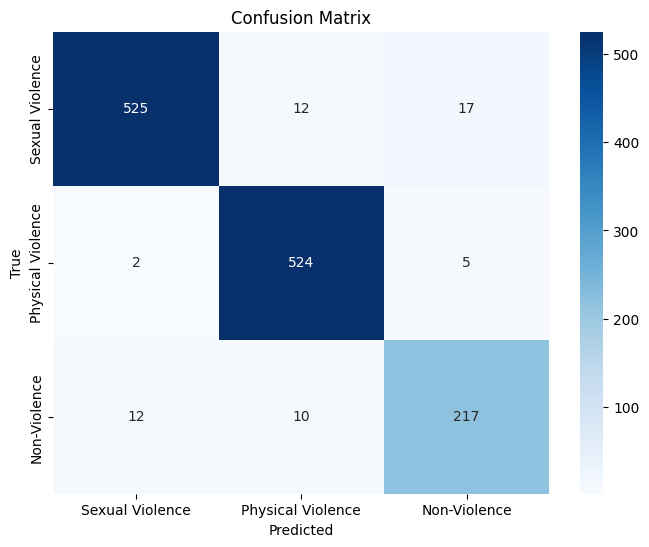

(0.9561933534743202,
 '                   precision    recall  f1-score   support\n\n  Sexual Violence       0.97      0.95      0.96       554\nPhysical Violence       0.96      0.99      0.97       531\n     Non-Violence       0.91      0.91      0.91       239\n\n         accuracy                           0.96      1324\n        macro avg       0.95      0.95      0.95      1324\n     weighted avg       0.96      0.96      0.96      1324\n',
 array([[525,  12,  17],
        [  2, 524,   5],
        [ 12,  10, 217]]))

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_and_plot_confusion_matrix(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    all_predictions = []
    all_true_labels = []

    # Iterate over batches in the test loader
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)

        # Get the logits
        logits = outputs.logits

        # Ensure logits are in the correct shape (batch_size, num_labels)
        if logits.ndim == 1:
            logits = logits.unsqueeze(0)

        # Convert logits to predicted class labels
        predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
        true_labels = labels.cpu().numpy()

        # Collect predictions and true labels
        all_predictions.extend(predictions)
        all_true_labels.extend(true_labels)

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_true_labels, all_predictions)
    class_report = classification_report(all_true_labels, all_predictions, target_names=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    conf_matrix = confusion_matrix(all_true_labels, all_predictions)

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'], yticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, class_report, conf_matrix

# Ensure model and test_loader are defined
evaluate_and_plot_confusion_matrix(model, test_loader)


In [28]:
from collections import Counter

def check_class_distribution(loader, label_name='labels'):
    all_labels = []
    for batch in loader:
        labels = batch[label_name].numpy()
        all_labels.extend(labels)

    counter = Counter(all_labels)
    total = sum(counter.values())
    for cls, count in counter.items():
        print(f"Class {cls}: {count} samples, {count / total:.2%} of total")

# Check distribution in training data
print("Training Data Distribution:")
check_class_distribution(train_loader)

# Check distribution in test data
print("Test Data Distribution:")
check_class_distribution(test_loader)


Training Data Distribution:
Class 0: 2266 samples, 42.82% of total
Class 1: 2118 samples, 40.02% of total
Class 2: 908 samples, 17.16% of total
Test Data Distribution:
Class 1: 531 samples, 40.11% of total
Class 0: 554 samples, 41.84% of total
Class 2: 239 samples, 18.05% of total


In [29]:
# Inspect Model Training
# Define the training function with class weights
def train_model_with_weights(learning_rate, num_epochs=10):
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(train_dataset.labels), y=train_dataset.labels)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

    # Define the loss function with class weights
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

    # Initialize the optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    # Store loss and accuracy values
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        total_train_accuracy = 0

        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = criterion(logits, labels)
            total_train_loss += loss.item()

            # Convert logits to predicted class labels
            predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
            true_labels = labels.cpu().numpy()

            # Calculate accuracy for this batch
            batch_accuracy = flat_accuracy(predictions, true_labels)
            total_train_accuracy += batch_accuracy

            loss.backward()
            optimizer.step()

        avg_train_loss = total_train_loss / len(train_loader)
        avg_train_accuracy = total_train_accuracy / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_accuracy)

        # Validation phase
        model.eval()
        total_val_loss = 0
        total_val_accuracy = 0

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits

                loss = criterion(logits, labels)
                total_val_loss += loss.item()

                # Convert logits to predicted class labels
                predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
                true_labels = labels.cpu().numpy()

                # Calculate accuracy for this batch
                batch_accuracy = flat_accuracy(predictions, true_labels)
                total_val_accuracy += batch_accuracy

        avg_val_loss = total_val_loss / len(test_loader)
        avg_val_accuracy = total_val_accuracy / len(test_loader)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate {learning_rate}, Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Check the model's class weights
print("Training with learning rate: 2e-5")
train_losses, val_losses, train_accuracies, val_accuracies = train_model_with_weights(2e-5)


Training with learning rate: 2e-5


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10, Learning Rate 2e-05, Train Loss: 0.0084, Train Acc: 0.9987, Val Loss: 0.4009, Val Acc: 0.9490
Epoch 2/10, Learning Rate 2e-05, Train Loss: 0.0007, Train Acc: 0.9998, Val Loss: 0.4699, Val Acc: 0.9445
Epoch 3/10, Learning Rate 2e-05, Train Loss: 0.0019, Train Acc: 0.9994, Val Loss: 0.4230, Val Acc: 0.9513
Epoch 4/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9996, Val Loss: 0.4592, Val Acc: 0.9513
Epoch 5/10, Learning Rate 2e-05, Train Loss: 0.0029, Train Acc: 0.9991, Val Loss: 0.4709, Val Acc: 0.9528
Epoch 6/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9998, Val Loss: 0.4851, Val Acc: 0.9521
Epoch 7/10, Learning Rate 2e-05, Train Loss: 0.0003, Train Acc: 0.9998, Val Loss: 0.4944, Val Acc: 0.9521
Epoch 8/10, Learning Rate 2e-05, Train Loss: 0.0015, Train Acc: 0.9992, Val Loss: 0.6502, Val Acc: 0.9483
Epoch 9/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9996, Val Loss: 0.5913, Val Acc: 0.9490
Epoch 10/10, Learning Rate 2e-05, Train Loss: 

Training with learning rate: 2e-5


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10, Learning Rate 2e-05, Train Loss: 0.0006, Train Acc: 0.9996, Val Loss: 0.5216, Val Acc: 0.9558
Epoch 2/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9998, Val Loss: 0.5397, Val Acc: 0.9588
Epoch 3/10, Learning Rate 2e-05, Train Loss: 0.0053, Train Acc: 0.9987, Val Loss: 0.5292, Val Acc: 0.9516
Epoch 4/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9998, Val Loss: 0.5518, Val Acc: 0.9516
Epoch 5/10, Learning Rate 2e-05, Train Loss: 0.0018, Train Acc: 0.9989, Val Loss: 0.4774, Val Acc: 0.9508
Epoch 6/10, Learning Rate 2e-05, Train Loss: 0.0033, Train Acc: 0.9987, Val Loss: 0.4545, Val Acc: 0.9536
Epoch 7/10, Learning Rate 2e-05, Train Loss: 0.0005, Train Acc: 0.9998, Val Loss: 0.4750, Val Acc: 0.9536
Epoch 8/10, Learning Rate 2e-05, Train Loss: 0.0004, Train Acc: 0.9998, Val Loss: 0.4865, Val Acc: 0.9528
Epoch 9/10, Learning Rate 2e-05, Train Loss: 0.0003, Train Acc: 0.9998, Val Loss: 0.5127, Val Acc: 0.9558
Epoch 10/10, Learning Rate 2e-05, Train Loss: 

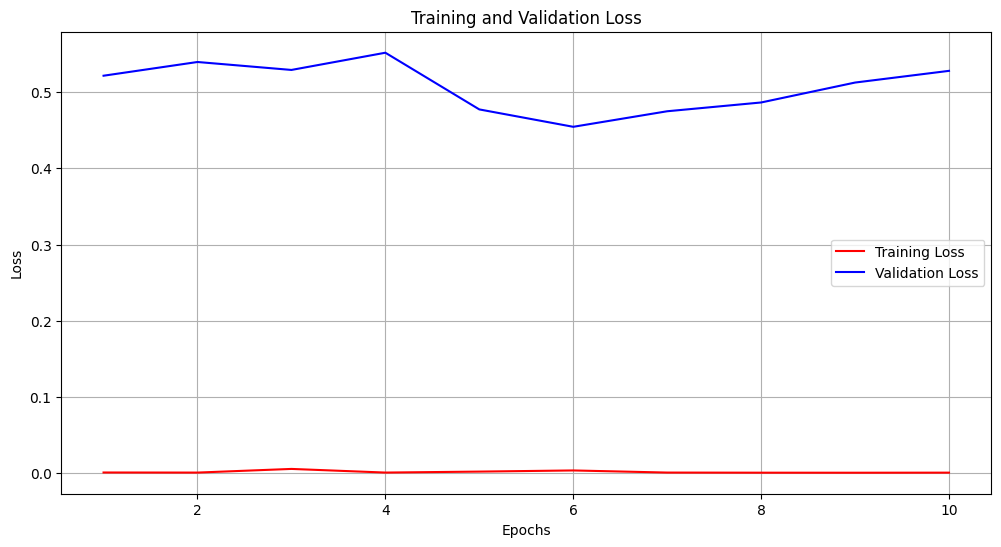

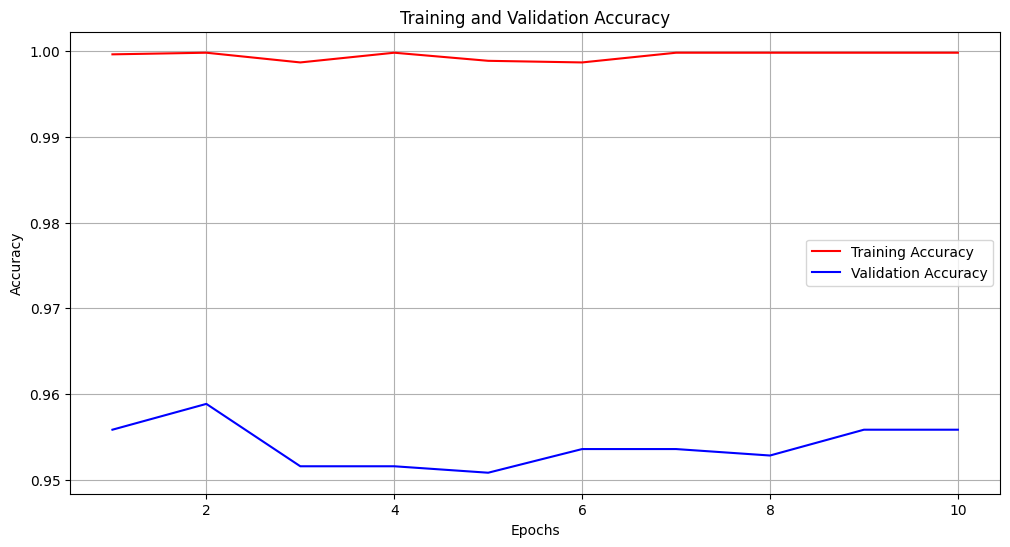

In [43]:
# Function to plot training and validation curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, 'r', label='Training Loss')
    plt.plot(epochs, val_losses, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_accuracies, 'r', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train the model
print("Training with learning rate: 2e-5")
train_losses, val_losses, train_accuracies, val_accuracies = train_model_with_weights(learning_rate=2e-5)

# Plot the training and validation curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

Accuracy: 0.9539
Classification Report:
                   precision    recall  f1-score   support

  Sexual Violence       0.97      0.95      0.96       554
Physical Violence       0.96      0.99      0.97       531
     Non-Violence       0.91      0.90      0.90       239

         accuracy                           0.95      1324
        macro avg       0.95      0.94      0.94      1324
     weighted avg       0.95      0.95      0.95      1324



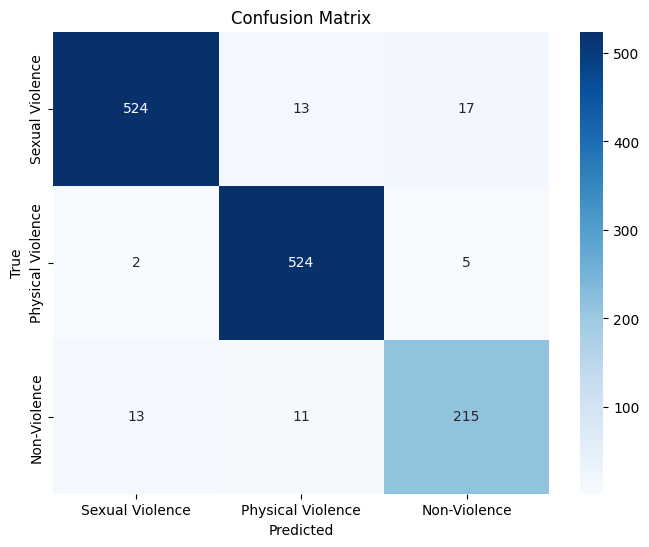

In [31]:
#Evaluate and Plot Predictions
def evaluate_and_predict(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    all_predictions = []
    all_true_labels = []

    # Iterate over batches in the test loader
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)

        # Get the logits
        logits = outputs.logits

        # Convert logits to predicted class labels
        predictions = np.argmax(logits.detach().cpu().numpy(), axis=1)
        true_labels = labels.cpu().numpy()

        # Collect predictions and true labels
        all_predictions.extend(predictions)
        all_true_labels.extend(true_labels)

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_true_labels, all_predictions)
    class_report = classification_report(all_true_labels, all_predictions, target_names=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    conf_matrix = confusion_matrix(all_true_labels, all_predictions)

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'], yticklabels=['Sexual Violence', 'Physical Violence', 'Non-Violence'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return all_predictions, accuracy, class_report, conf_matrix

# Evaluate the model on test data
predictions, accuracy, class_report, conf_matrix = evaluate_and_predict(model, test_loader)
